# <span style="color:blue"> Viruses </span> vs. <span style="color:red">Bacteria </span>

Jessica Hoban <br>
Professor Li <br>
INFO 250 <br>
16 August 2020 <br>

---------

#### Import libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

import seaborn as sns
import pandas as pd
import numpy as np

#### Data manipulation and visualization

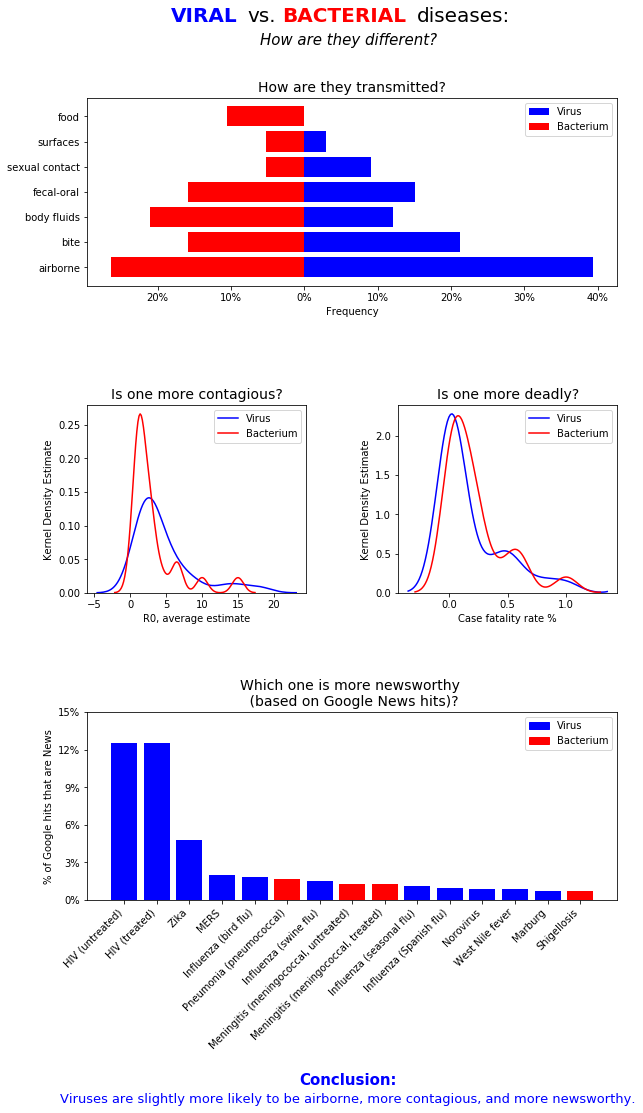

In [15]:
# Initialize dataframes
df = pd.read_csv("./Microbe-scope.csv")

virus_df = df[df['Pathogen type'] == 'virus']
bacterium_df = df[df['Pathogen type'] == 'bacterium']
vir_bac_df = df[df['Pathogen type'].isin(['virus','bacterium'])]

# Initialize matplotlib plot and subplots
fig = plt.figure(figsize=(10,15))
gs = GridSpec(3, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :-2])
ax3 = fig.add_subplot(gs[1, -2:])
ax4 = fig.add_subplot(gs[2, :])

# Set figure title using different colors
fig.text(0.35, 1, "VIRAL", ha="center", va="bottom", fontsize=20, color="blue", fontweight="bold")
fig.text(0.43, 1, "vs.", ha="center", va="bottom", fontsize=20)
fig.text(0.545, 1,"BACTERIAL", ha="center", va="bottom", fontsize=20,color="red", fontweight="bold")
fig.text(0.71, 1, "diseases:", ha="center", va="bottom", fontsize=20)
fig.text(0.55, 0.98, "How are they different?", ha="center", va="bottom", fontsize=15, fontstyle="italic")


# -------------------------------------------------------
# QUESTION 1: How do viruses and bacteria differ in transmission modes?

# Counts of transmission types
virus_modes = dict(virus_df['Primary mode of transmission '].value_counts())
bacterium_modes = dict(bacterium_df['Primary mode of transmission '].value_counts())

# Lists of transmission modes -> Individual transmission modes
virus_modes['surfaces'] = 0
for k,v in virus_modes.items():
    if k == 'airborne, fecal-oral':
        virus_modes['airborne'] += 1
        virus_modes['fecal-oral'] += 1
    
    elif k == 'bite, sexual contact':
        virus_modes['bite'] += 1
        virus_modes['sexual contact'] += 1
        
    elif k == 'fecal-oral, surfaces':
        virus_modes['fecal-oral'] += 1
        virus_modes['surfaces'] += 1
        
del virus_modes['airborne, fecal-oral']   
del virus_modes['bite, sexual contact']    
del virus_modes['fecal-oral, surfaces']   

for k,v in bacterium_modes.items():
    if k == 'airborne, body fluids':
        bacterium_modes['airborne'] += 1
        bacterium_modes['body fluids'] += 1
    
del bacterium_modes['airborne, body fluids']  

# Generating data for subplot 1
virus_sum = sum(virus_modes.values()) #virus_df.shape[0]
virus_ax1Y = [k for k,v in virus_modes.items()]
virus_ax1X = [v/virus_sum for k,v in virus_modes.items()]

bacterium_sum = sum(bacterium_modes.values()) #bacterium_df.shape[0]
bacterium_ax1Y = [k for k,v in bacterium_modes.items()]
bacterium_ax1X = [-v/bacterium_sum for k,v in bacterium_modes.items()]

# Plotting population bar graphs
ax1.barh(virus_ax1Y, virus_ax1X, color = 'b', label = 'Virus')
ax1.barh(bacterium_ax1Y, bacterium_ax1X, color = 'r', label = 'Bacterium')

# Fine-tuninig plot
ax1.set_xlabel("Frequency")
ax1.legend()
plt.sca(ax1)
plt.xticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4], ["20%", "10%", "0%", "10%", "20%", "30%", "40%"])
ax1.set_title("How are they transmitted?", fontsize=14)


# -------------------------------------------------------
# QUESTION 2: Is there a difference in contagiousness or deadliness
#             between viruses and bacteria?

# Generating data for subplots 2 and 3
virus_ax2 = virus_df["R0, average estimate"]
bacterium_ax2 = bacterium_df["R0, average estimate"]

virus_ax3 = virus_df["Case fatality rate %"]
bacterium_ax3 = bacterium_df["Case fatality rate %"]

# CONTAGIOUSNESS (RO AVERAGE ESTIMATE)
# Plotting distribution plots (Kernel Density Estimates)
sns.distplot(virus_ax2, color = 'b', hist = False,\
             label = 'Virus', ax = ax2)
sns.distplot(bacterium_ax2, color = 'r', hist = False,\
             label = 'Bacterium', ax = ax2)
ax2.legend()
ax2.set_title("Is one more contagious?", fontsize=14)
ax2.set_ylabel("Kernel Density Estimate")

# DEADLINESS (CASE FATALITY RATE %)
# Plotting distribution plots (Kernel Density Estimates)
sns.distplot(virus_ax3, color = 'b', hist = False,\
             label = 'Virus', ax = ax3)
sns.distplot(bacterium_ax3, color = 'r', hist = False,\
             label = 'Bacterium', ax = ax3)
ax3.legend()
ax3.set_title("Is one more deadly?", fontsize=14)
ax3.set_ylabel("Kernel Density Estimate")

#plt.sca(ax3)
#plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0], ["0", "", "1", "", "2"])



# -------------------------------------------------------
# QUESTION 3: Do they have different notoriety / newsworthiness?

# Generating data for subplot 4
sorted_df = vir_bac_df.sort_values(by=["News hits as % general hits (inflammation rating)"], \
                                   ascending=False)[:15]
def color(row):
    if row["Pathogen type"] == 'virus':
        return 'b'
    elif row["Pathogen type"] == 'bacterium':
        return 'r'

sorted_df['Color'] = sorted_df.apply(lambda row: color(row), axis=1)
ax4Color = sorted_df['Color']
ax4Name = sorted_df["Disease name"]
ax4Y = sorted_df["News hits as % general hits (inflammation rating)"]

# NOTORIETY (Google News hits/ Google hits)
# Plotting bar graph colored by pathogen type
ax4.bar(x = ax4Name, height= ax4Y, color = ax4Color)

red_patch = mpatches.Patch(color='red', label='Bacterium')
blue_patch = mpatches.Patch(color='blue', label='Virus')
ax4.legend(handles=[blue_patch, red_patch])

ax4.set_title("Which one is more newsworthy \n (based on Google News hits)?", fontsize=14)
ax4.set_ylabel("% of Google hits that are News")
plt.sca(ax4)
yticks = np.arange(int(min(ax4Y)), int(max(ax4Y))+4, 3)
yticks_pct = [str(i)+"%" for i in yticks ]
plt.yticks(yticks, yticks_pct)
#plt.tick_params(direction='inout')
plt.xticks(rotation=45, va='top', ha='right')

# -------------------------------------------------------
plt.tight_layout(pad = 5.5)
print("\n\n\n")
fig.text(0.55, 0.017, "Conclusion:", ha="center", va="bottom", fontsize=15, color="blue", fontweight="bold")
fig.text(0.55, 0.00, "Viruses are slightly more likely to be airborne, more contagious, and more newsworthy.", ha="center", va="bottom", fontsize=13,color="blue")
plt.show()
print("\n\n\n")


**Explanation of visualization:** The overall purpose of this static dashboard is to explore the differences between viral and bacterial diseases. We first look to see if they are transmitted differently, and can see that viruses tend to be airborne more often and food-borne less often than bacteria. We then overlay KDE plots for both pathogen types, showing their distribution of contagiousness (R0 average estimate). We see that viruses tend to be only slightly more contagious. Performing a similar KDE plot comparison for deadliness (case fatality rate), we see that they are very similar in this regard, with bacteria being only mildly deadlier. Finally, we look at the top 15 diseases based on their newsworthiness (% of Google hits classified as Google News) and colored by their pathogen type. Based on the fact that 11 out of 15 of the bars are blue, we can infer that viruses tend to get more press coverage. We then summarize all of this briefly in a Conclusion annotation at the bottom of the dashboard.
